Hi Itay. I'm Svetlana and will review your project. I've added all my comments to new cells with different coloring. Please don't delete my comments.


The first time I see a mistake, I'll just point it out and let you find it and fix it yourself. In a real job, your boss will do the same, and I'm trying to prepare you to work as an Data Analyst. But if you can't handle this task yet, I'll give you a more accurate hint at the next check.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
If the topic requires some extra work so I can accept it then the color will be red
</div>

## Review v. 1<a class="tocSkip">

Thank you! Your project has been received. You've put a lot of work into this! But, unfortunately, your project is not quite ready for review. This is because the code doesn’t run because of error. One more time and you'll have it!
    
## Review v. 2<a class="tocSkip">
    
Thank you for taking the time to correct your project! I really appreciate your hard work. There's still a minor issue with this part statistical tests. Here are a few more pointers to help you put the final touches on your project. Keep working, you've got this!
    
## Review v. 3<a class="tocSkip">
    
Thank you so much for submitting your project! It seems like something went wrong and you sent a version without any changes. Please check it again. You're almost there!
    
## Review v. 4<a class="tocSkip">
    
Now your project is a true "A". Congratulations! I'm glad to say that your project has been accepted.  Keep up the good work, and good luck on the next sprint!

Project description

You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.<br>
**You need to prioritize these hypotheses, launch an A/B test, and analyze the results.**

------------------------------------

Description of the data
Data used in the first part of the project
/datasets/hypotheses_us.csv Download dataset

    Hypotheses — brief descriptions of the hypotheses
    Reach — user reach, on a scale of one to ten
    Impact — impact on users, on a scale of one to ten
    Confidence — confidence in the hypothesis, on a scale of one to ten
    Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

Data used in the second part of the project
/datasets/orders_us.csv Download dataset

    transactionId — order identifier
    visitorId — identifier of the user who placed the order
    date — of the order
    revenue — from the order
    group — the A/B test group that the user belongs to

/datasets/visits_us.csv Download dataset

    date — date
    group — A/B test group
    visits — the number of visits on the date specified in the A/B test group specified

 

 Research plan:
<a class="anchor" id="table_of_contents"></a>

[table_of_contents](#table_of_contents)

1. [look at general information of the data](#general_information)
    * Load data
    * Explore data
2. [preprocess](#preprocess)
    * Replace the column names (make them lowercase).
    * Convert the data to the required types.
    * Describe the columns where the data types have been changed and why.
    * If necessary, decide how to deal with missing values:
        ◦ Explain why you filled in the missing values as you did or why you decided to leave them blank.
        ◦ Why do you think the values are missing? Give possible reasons.
        ◦ Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
    * Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.
3. [Prioritizing Hypotheses:](#Prioritizing_Hypotheses)
    * Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
    * Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
    * Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.
4. [A/B Test Analysis](#A/B_Test_Analysis)
    * Graph cumulative revenue by group. Make conclusions and conjectures.
    * Graph cumulative average order size by group. Make conclusions and conjectures.
    * Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.
    * Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.
    * Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.
    * Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.
    * Plot a scatter chart of order prices. Make conclusions and conjectures.
    * Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.
    * Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.
    * Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.
    * Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.
    * Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.
    * Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

Here’s what project reviewers look for when assessing your project:

    How you prepare the data for analysis
    How you prioritize hypotheses
    How you interpret the resulting graphs
    How you calculate statistical significance
    What conclusions you draw based on the A/B test results
    Whether you follow the project structure and keep the code tidy
    The conclusions you make
    Whether you leave comments at each step


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Good job that you clearly described the project.
</div>

<a class='anchor' id='general_information'></a>
[Go back to the Table of Contents](#table_of_contents)
## [General information](#general_information)

In [1]:
!pip install plotly==5.1.0 

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 20.6 MB 1.0 MB/s eta 0:00:01


In [2]:
pip install sidetable

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 1.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install squarify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Load relevant libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import seaborn as sns
import sidetable
import squarify
import warnings
warnings.simplefilter ('ignore')

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

plt.rcParams['figure.figsize'] = [15,6]

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# Load data
try:
    visits_df = pd.read_csv('./visits_us.csv')
    orders_df = pd.read_csv('./datasets/orders_us.csv.csv')
    hypotheses_df = pd.read_csv('./hypotheses_us.csv')
except:
    visits_df = pd.read_csv('/datasets/visits_us.csv')
    orders_df = pd.read_csv('/datasets/orders_us.csv')
    hypotheses_df = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

dfs = {'visits_df':visits_df, 'orders_df':orders_df,'hypotheses_df':hypotheses_df}

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's useful practice to use try-except for the path to the file.
</div>

Lets explore the data:

In [6]:
for df_name in dfs:
    print(df_name)
    dfs[df_name].info()
    display(dfs[df_name].head())
    print()

visits_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



orders_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B



hypotheses_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


We can see several columns that need to be changed to date type:

visits_df: date

order_df: date

Change columns in hypotheses_df to lowercase

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, it's necessary to change data type.
</div>

Lets look for duplicates.


In [7]:
for df_name in dfs:
    display(dfs[df_name][dfs[df_name].duplicated()])


,date,group,visits


,transactionId,visitorId,date,revenue,group


,Hypothesis,Reach,Impact,Confidence,Effort


Lets for check if any users are in both groups and if we find any remove them.

In [8]:
visits_df['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

visits_df is fine, lets check orders_df

In [9]:
orders_df['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [10]:
640-557

83

We have a discrepancy. 83 users difference.<br>
Lets explore some more

In [11]:
orders_pivot = pd.pivot_table(orders_df, values='group', index=['visitorId'], aggfunc='nunique').sort_values(by='visitorId').reset_index()
orders_pivot.group.value_counts()

1    973
2     58
Name: group, dtype: int64

58 users are in both groups. lets remove them.

There are no :
* na values
* no duplicates

Need to fix:
* visits_df: date
* order_df: date
* hypotheses_df columns to lower case
* removing users that are in both groups in order_df

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please check are there any users belonging to both groups.
</div>

<div class="alert alert-block alert-info">
Checked for users in both and will remove in the preprocess.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 3:
    
Ok :)
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, we don't have a missing values and duplicates.
</div>

<a class='anchor' id='preprocess'></a>
[Go back to the Table of Contents](#table_of_contents)
## [preprocess](#preprocess)

* [x] Change visits_df: date to date type
* [x] Change order_df: date to date type
* [x] hypotheses_df columns to lower case
* [X] remove users from both groups in order_df

In [12]:
visits_df.date = pd.to_datetime(visits_df.date, format='%Y-%m-%d')
orders_df.date = pd.to_datetime(orders_df.date, format='%Y-%m-%d')
visits_df.info()
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [13]:
hypotheses_df.columns = hypotheses_df.columns.str.lower()
hypotheses_df.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')

Removing users from both groups in orders_df

In [14]:
orders_a = orders_df.query('group == "A"')['visitorId'].to_list()
orders_b = orders_df.query('group == "B"')['visitorId'].to_list()

both = [x for x in orders_a if x in orders_b]

orders_df = orders_df[~orders_df['visitorId'].isin(both)]

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, it's necessary to remove users belonging to both groups.
</div>

We have cleaned the data and are ready to move forward.

----------------
<a class='anchor' id='Prioritizing_Hypotheses'></a>
[Go back to the Table of Contents](#table_of_contents)
## [Prioritizing Hypotheses:](#Prioritizing_Hypotheses)

We need to prioretize our hypotheses, we will use **ICE** framework to do that.

**ICE = impact * confidence * ease**<br>
or<br>
**ICE = (impact * confidence) / effort**

In [15]:
hypotheses_df['ICE'] = (hypotheses_df['impact'] * hypotheses_df['confidence']) / hypotheses_df['effort']
hypotheses_df.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


Next we will apply **RICE** framwork to prioritize the hypotheses

In [16]:
hypotheses_df['RICE'] = (hypotheses_df['reach'] * hypotheses_df['impact'] * hypotheses_df['confidence']) / hypotheses_df['effort']
hypotheses_df.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


We can see the diffecrence between the **ICE** and **RICE** frameworks.

Hypotheses 7 in the **ICE: Add a subscription form to all the main pages..** was number three in the top scores.
<br> Now is number 1 in the scores.

Hypotheses 8 in the **ICE: Launch a promotion that gives users discounts..** was number one in the top scores.
<br> Now is number 4 in the scores.

The difference is the **reach** element. <br>
10 for hypotheses 7 and 1 for hypotheses 8.

According to **RICE** we can reach much more users with hypotheses 7.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
You correctly calculated ICE scores and identified the highest priority hypotheses. It will be nice to show RICE and ICE scores on the same plot. This makes it easier to analyze.
</div>

<a class='anchor' id='A/B_Test_Analysis'></a>
[Go back to the Table of Contents](#table_of_contents)
## [A/B Test Analysis](#A/B_Test_Analysis)



* Graph cumulative average order size by group. Make conclusions and conjectures.

* Graph the relative difference in cumulative average order size for group B compared with group A. Make 

**Graph cumulative revenue by group. Make conclusions and conjectures.**

Lets prepare the data to be able to answer these questions:
We need to group by date and by group.<br> 
We will also do some extra work to help us answer future questions.

In [17]:
datesGroups = orders_df[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders_df[np.logical_and(orders_df['date'] <= x['date'],
                            orders_df['group'] == x['group'])].agg({'date' : 'max',
                                                                    'group' : 'max',
                                                                    'transactionId' : pd.Series.nunique,
                                                                    'visitorId' : pd.Series.nunique,
                                                                    'revenue' : 'sum'}),
                            axis=1).sort_values(by=['date','group'])

We will do similar work on visits_df

In [18]:

visitorsAggregated = datesGroups.apply(lambda x: visits_df[np.logical_and(visits_df['date'] <= x['date'],
                                        visits_df['group'] == x['group'])].agg({'date' : 'max',
                                                                               'group' : 'max',
                                                                               'visits' : 'sum'}),
                                       axis=1).sort_values(by=['date','group'])

In [19]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   2266.6       719
1 2019-08-01     B      17      17    967.2       713
2 2019-08-02     A      42      36   3734.9      1338
3 2019-08-02     B      40      39   3535.3      1294
4 2019-08-03     A      66      60   5550.1      1845


<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
Please note that you can avoid "<matplotlib.legend.Legend at 0x7f5bf7a329d0>" by using ";" after code lines with graph.
</div>

In [20]:
# Time to plot:

# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

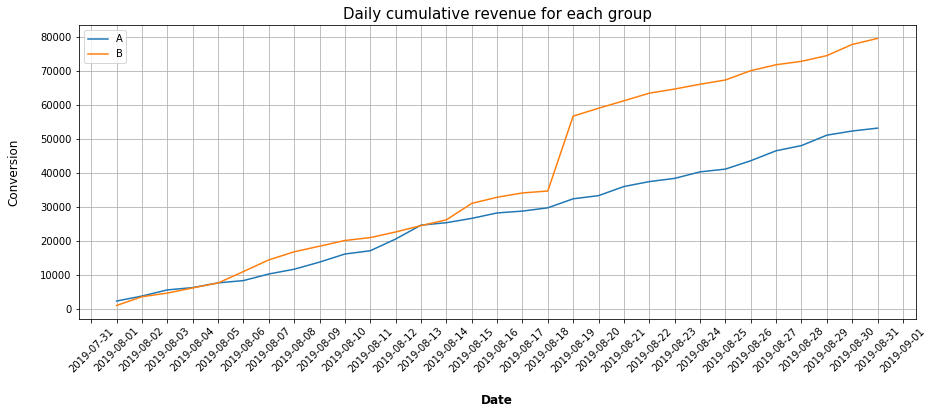

In [21]:
fig, ax = plt.subplots()

ax.set_title('Daily cumulative revenue for each group', size=15)
ax.set_xlabel("Date", labelpad=20, weight='bold', size=12)
plt.xticks(rotation=45)
ax.set_ylabel("Conversion", labelpad=20, size=12)

# xticks per day
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

# plotting
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'],  cumulativeRevenueB['revenue'], label='B')
plt.grid()
plt.legend()
plt.plot();

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please add the axis labels and the title to the graph?
This applies to all other graphs too.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Great, now graph looks better :)
</div>

We can see that group B cumelative revenue is heigher and take a big difference around 2019-08-17

--------------------------
**Graphing cumulative average order size by group.**

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
During 17-18 of August we have increase of cumulative revenue for group B. Could you please explain it? (What is the possible reason of it)?
</div>

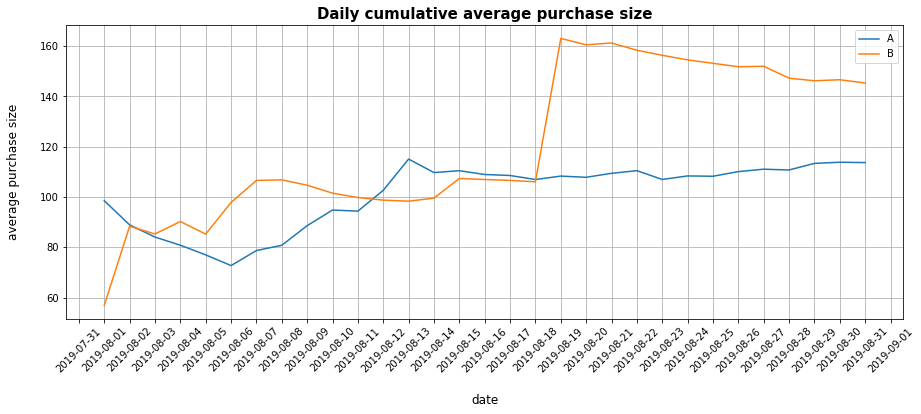

In [22]:
fig, ax = plt.subplots()

ax.set_title('Daily cumulative average purchase size', weight='bold', size=15)
ax.set_xlabel("date", labelpad=20, size=12)
plt.xticks(rotation=45)
ax.set_ylabel("average purchase size", labelpad=20, size=12)

# xticks per day
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

# plotting
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid()
plt.legend()
plt.plot();

Average cumelative revenue by order size shows again that group B has heigher revenue again in the same date(2019-08-17) we see a spike in revenue, this migh indicate an outlier.
Other possibilities, a shopping day(though I couldn't find anything by goggeling on this date)<br>
Or maybe a new service that launched on the website

------------------------
**Graph the relative difference in cumulative average order size for group B compared with group A.**

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, the spike can be due to large orders.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, you correctly noted that we have an outliers.
</div>

In [23]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

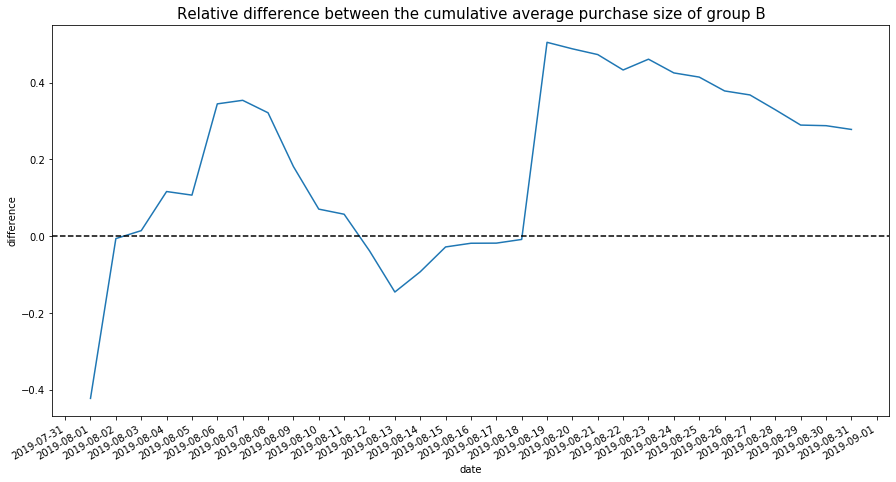

In [24]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=mergedCumulativeRevenue, x='date', 
             y=(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# Add labels platforms that used to be popular but now have zero sales
ax.set_title('Relative difference between the cumulative average purchase size of group B', fontdict={'size':15})
ax.set_ylabel('difference')
ax.set_xlabel('date')

# xticks per day
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--') 

plt.show()

This only strengthes our conclusion that group B has better revenue even when compared to the number of orders.

------------------
Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok :)
</div>

In [25]:
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

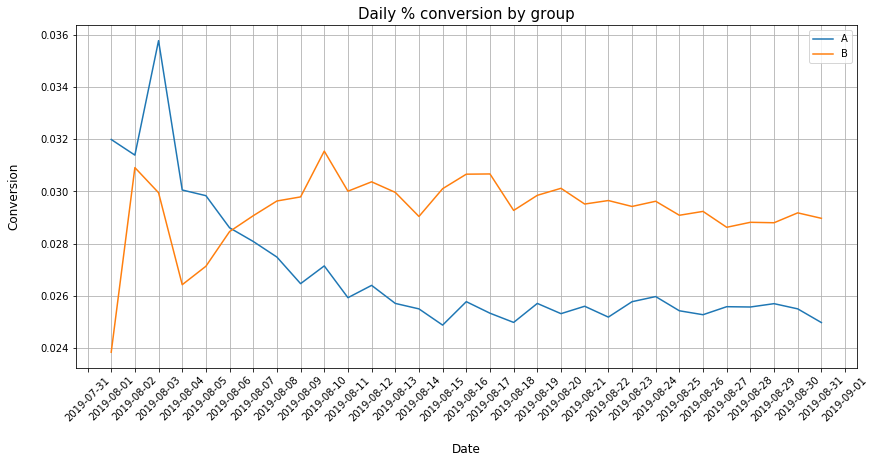

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(14,7)

ax.set_title("Daily % conversion by group", size=15)
ax.set_xlabel("Date", labelpad=20, size=12)
ax.set_ylabel("Conversion", labelpad=20, size=12)

# xticks per day
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

# plotting
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.grid()
plt.legend()
plt.xticks(rotation=45)

plt.plot();

Group B was the leader in conversion almost from the very beginning. It gained steadily and stabilized (0.034-0.03 = 0.004) ~13% higher than group A.

-------------------------------
**Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.**

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, the conversion rate is stabilized by the end of the test and group B is a leader.
</div>

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


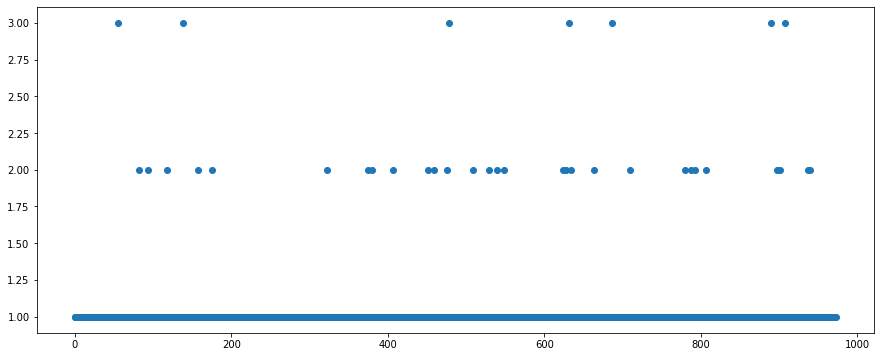

In [27]:
ordersByUsers = (
    orders_df.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# the range of numbers from 0 to the number of observations in ordersByUsers

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) ;

The majority of users order 1 item, 2 orders is much less likely. the outliers order 11.
these need to be dealt with.

-----------------
**Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.**

In [28]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 1. 2.]


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Excellent, the 90th, 95th and 99th percentiles of the number of orders per user were calculated correctly.
</div>

We can now see in precintile how much do these ourliers are relevant to our data, conclusion not so much.
We also need to see the revenue to better understand the effects. maybe a lot of order but small revenue.<br>
**We will define having more than 2 orders as the point where data becomes an anomaly.**


---------------
**Plot a scatter chart of order prices**

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please define the point at which a data point becomes an anomaly?
</div>

<div class="alert alert-block alert-info">
Defined the point data becomes and anomaly.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, 2 orders can be considered as a boundary for an anomaly point.
</div>

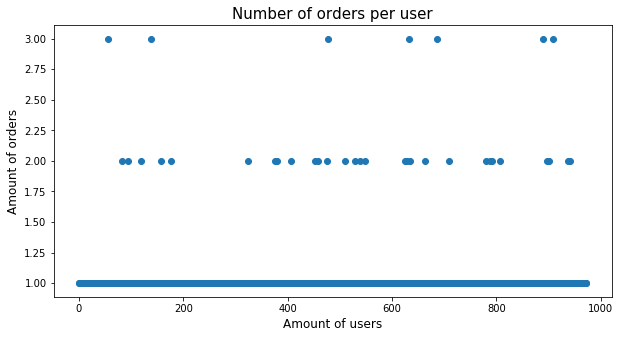

In [29]:
x_values = pd.Series(range(0,len(ordersByUsers)))

fig, ax = plt.subplots()
fig.set_size_inches(10,5)

ax.set_title('Number of orders per user', size=15)
ax.set_xlabel('Amount of users', size=12)
ax.set_ylabel('Amount of orders', size=12)

plt.scatter(x_values, ordersByUsers['orders']);

The outliers are even more noticable, and there effects are huge. but to be sure lets see in numbers to better understand in what values we should filter.

---------------
**Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.**

In [30]:
print(np.percentile(orders_df['revenue'], [90, 95, 99])) 

[280.8   414.275 830.3  ]


Between 90 and 95 we can see a big jump, 435-282 = 153. <br>
153/ 282 = 0.54 the difference is more than 50%.<br>
**The point where data become an anomaly are values larger than 435.54** 


--------------
**Finding the statistical significance of the difference in conversion between the groups using the raw data.**

We'll examine the statistical difference in conversion rate between the groups in the raw data.<br>
H0 (our null hypothesis) is that there is no difference in conversion rate between the groups.<br>
H1 (our alternative hypothesis) is that there is a difference in conversion between the two groups.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Yes, correct values of percentiles of order prices. Please define the point at which a data point becomes an anomaly.
</div>

<div class="alert alert-block alert-info">
Defined the point data becomes an anomaly in revenue
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
You are right, this value can be considered as a boundary for an anomalies.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please formulate the null and alternative hypotheses explicitly.
</div>
<div class="alert alert-block alert-info">
Added the H0 and Null hyptohesis
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Hypotheses formulation is correct :)
</div>

In [31]:
ordersByUsersA = orders_df[orders_df['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders_df[orders_df['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits_df[visits_df['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits_df[visits_df['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.00551
0.160


<div class="alert alert-warning" role="alert">
Reviewer's comment v. 2:
    
Could you please formulate a conclusion for this statistical test? I mean to formulate it in more detail "reject the null hypothesis" (just add information about conversion rate).
</div>

The p-value is less than 0.05 so we have to reject the null hypothesis <br>
The ratio of mean is 16%

------


We found that the 95 precntile of users who orded have 2 orders <br>
And that the 95 precntile of revenue from orders is 435.54.

**Find the statistical significance of the difference in average order size between the groups using the raw data.**<br>
H0 (our null hypothesis) is that there is no difference in average order size between the groups.<br>
H1 (our alternative hypothesis) is that there is a difference in average order size between the two groups.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 2:
    
Could you please add hypotheses formulation? Please note that this comment applies to all other statistical tests too.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 3:
    
👍👍👍
</div>

In [32]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders_df[orders_df['group']=='A']['revenue'], orders_df[orders_df['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders_df[orders_df['group']=='B']['revenue'].mean()/orders_df[orders_df['group']=='A']['revenue'].mean()-1))

0.431
0.278


The p-value is greater than 0.05, so there's no reason to reject the null hypothesis.<br>
The relative difference is 25.2%.  

---------------
**Find the statistical significance of the difference in average order size between the groups using the filtered data.**

first lets filter.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please fix the error below (code doesn't run).
</div>

<div class="alert alert-block alert-info">
Sorry for that, fixed now.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Great, now it works :)
</div>

In [33]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders_df[orders_df['revenue'] > 435.54]['visitorId']

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 3:
    
Could you please add hypotheses formulation?
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 4:
    
I recommend to add hypotheses formulation for each of the statistical test (even if it's the same).
</div>

In [34]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits_df[visits_df['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits_df[visits_df['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

usersWithExpensiveOrders = orders_df[orders_df['revenue'] > 10000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))



0.00473
0.189




----------------------------
Find the statistical significance of the difference in average order size between the groups using the filtered data.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 3:
    
Could you please formulate the null and alternative hypotheses for all statistical tests?
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 4:
    
It will be better to formulate hypotheses for each of the statistical test.
</div>

In [35]:
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders_df[np.logical_and(
        orders_df['group']=='A',
        np.logical_not(orders_df['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders_df[np.logical_and(
        orders_df['group']=='B',
        np.logical_not(orders_df['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders_df[np.logical_and(orders_df['group']=='B',np.logical_not(orders_df['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders_df[np.logical_and(
        orders_df['group']=='A',
        np.logical_not(orders_df['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.355
-0.042


The p-value is greater than 0.05, so there are no statistically significant differences between the groups' average order sizes.there's no reason to reject the null hypothesis.

The difference has decreased dramaticly to 4.2%.

**Make a decision based on the test results.**

* We saw when the data was raw that B was leading by 0.346 in conversion and avg revenue.
* After filtering we saw that still group B was leading by 0.335 in conversion and avg revenue.

We should stop the test and consider B the leading group.

* we have prepared the data:
    * change types for date
    * found 58 users were both in A and B groups, we removed them.
    * values to lower case in columns
* There was an anomly on 2019-08-17, we couldn't find a reason bu possible: shopping day, a new service was launched.
* The raw data revealed a statistically significant difference in conversion between the groups, as group B had 16% higher conversion.
* The filtered data revealed a statistically significant difference in conversion between the groups, as group B had 18% higher conversion.
* The raw data showed Group B had 27% lead over group A in terms of average order size.
* The filtered data showed Group B's average order size is almost the same (-0.042) as group A's
* Neither raw or filtered data revealed any statistically significant diffeences in average order size between the groups.

**We conclude that we should stop the test and consider group B as the leading group in terms of conversion (+18%), as this is a crucial metric for our goal - boosting the revenue and this gap of 18% is a big enough increase in conversion to call group B the most succesful group**

<div class="alert alert-block alert-info">
Thank you for your time an patience :)
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 2:
    
Could you please describe all main results of the project (data preparation, anomalies, main findings and so on)?
    
The conclusion is intended to help the reader understand why your research should matter to them after they have finished reading the paper. A conclusion is not merely a summary of your points or a re-statement of your research problem but a synthesis of key points. </div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 3:
    
Please describe all main results of the project (data preparation, anomalies, main findings and so on) shortly. 
</div>

<div class="alert alert-block alert-info">
I have added data preperation and anomalies.
Not sure about 
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 4:
    
An excellent conclusion :) Yes, you are right, we can make a decision that group B is a leader.
</div>